# <center> **Unicorn Companies Data** </center>
**---------------------------------------Complete Exploratory Data Analysis-----------------------------------------**

## About Dataset
>- **`Description`**\
> The Data Set was downloaded from Kaggle, from the following [link](https://www.kaggle.com/datasets/rajkumarpandey02/complete-list-of-unicorn-companies)

- `Context`
    In business, a unicorn is a privately held startup company valued at over **$1 billion**. The term was first popularised in 2013 by venture capitalist Aileen Lee, choosing the mythical animal to represent the statistical rarity of such successful ventures. In this Dataset we have The Complete List Of Unicorn Companies around the world provided by cbinsights.com. The Method for collecting the Data is Web Scraping

- `Content`
In this Dataset we have The Complete List Of Unicorn Companies around the world provided by **cbinsights.com**

- `Data Columns`:
    - Index of Serial Number
    - Name of the Company
    - Total valuation in ($B)
    - Date of joining the Unicorn Club
    - Origin Country
    - Origin City
    - Domain of Work
    - Name of Investors


## 1. Importing Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

>- %matplotlib inline is used for jupyter notebook to show the plot in the 
notebook itself instead of opening in a new window for the plot

## **2.0 Data Loading and exploration and cleaning**
 ↪ Load the csv file with the pandas
 
 ↪ creating the dataframe and understanding the data present in the dataset using pandas
 
 ↪ Dealing with the missing data, outliers and the incorrect records

In [2]:
os.listdir("/kaggle/input")
df_unicorn = pd.read_csv('/kaggle/input/complete-list-of-unicorn-companies/unicorn.csv')

- This is to display all the columns and rows in the dataframe

In [3]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 

> **Note**: Some the output of notebook does not present the complete output, therefore we can increase the limit of columns view and row view by using pandas set_option commands: 

- Hiding all warnings at runtime

In [4]:
import warnings
warnings.filterwarnings('ignore')

- Showing first 5 rows of the dataset

In [5]:
df_unicorn.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


- Showing all columns name

In [6]:
cols_list = list(df_unicorn.columns)
cols_list

['Unnamed: 0',
 'Company',
 'Valuation ($B)',
 'Date Joined',
 'Country',
 'City',
 'Industry',
 'Select Investors']

- Looking the shape of the dataset

In [7]:
(observations,features) = df_unicorn.shape
print(f"# of Observations: {observations}\n# of Features: {features} ")

# of Observations: 1201
# of Features: 8 


- Looking columns and their data types using detailed info function

In [8]:
df_unicorn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201 entries, 0 to 1200
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1201 non-null   int64 
 1   Company           1201 non-null   object
 2   Valuation ($B)    1201 non-null   object
 3   Date Joined       1201 non-null   object
 4   Country           1201 non-null   object
 5   City              1183 non-null   object
 6   Industry          1201 non-null   object
 7   Select Investors  1200 non-null   object
dtypes: int64(1), object(7)
memory usage: 75.2+ KB


In [9]:
df_unicorn.isnull().sum()

Unnamed: 0           0
Company              0
Valuation ($B)       0
Date Joined          0
Country              0
City                18
Industry             0
Select Investors     1
dtype: int64

# **Observations**
---
1. There are 1201 rows and 8 columns in the dataset
2. We have columns of two types`int64` and `object`
3. The columns in the datasets are:
    - ['Unnamed: 0', 'Company', 'Valuation ($B)','Date Joined', 'Country','City', 'Industry', 'Select Investors']
4. The name of the first column is missing that is basically the id column and it showing as `Unnamed: 0`. We will deal with this column later on in the notebook
5. There are few missing values in the dataset which we will also impute later on in the notebook
6. The `Valuation ($B)` is of object data type but it should be of numeric data type and `Date Joined` should be in date type, we will convert them later on in the notebook.


- Showing statistical summary of the dataset

In [10]:
df_unicorn.describe()

,Unnamed: 0
count,1201.000000
mean,600.000000
std,346.843144
min,0.000000
25%,300.000000
50%,600.000000
75%,900.000000
max,1200.000000


## Observations:
- We have only 1 column as numeric data type i.e `Unnamed: 0` that is the id of each row, rest all are object data type, but we can see that `Valuation ($B)` is an object type column, we must convert it to numeric data type in data wrangling process.

- Let's clean the `Valuation ($B)` column first

In [11]:
df_unicorn['Valuation ($B)'].isnull().sum()

0

>- No null values in `Valuation ($B)`, we are good to go.

- Chcking unique values

In [12]:
df_unicorn['Valuation ($B)'].unique()

array(['$140', '$127', '$100', '$95', '$40', '$39', '$38', '$33', '$31.5',
       '$32', '$27', '$25', '$22', '$20', '$17.5', '$15.5', '$15', '$14',
       '$13.5', '$13.3', '$13', '$12.6', '$12.59', '$12.3', '$12',
       '$11.8', '$11.7', '$11.4', '$11.25', '$11.1', '$11', '$10.2',
       '$10.88', '$10.7', '$10', '$9.5', '$9.28', '$9.23', '$9.2',
       '$9.08', '$9', '$8.75', '$8.7', '$8.6', '$8.5', '$8.4', '$8.3',
       '$8.1', '$8', '$7.83', '$7.6', '$7.75', '$7.5', '$7.4', '$7.3',
       '$7.25', '$7.1', '$7', '$6.8', '$6.7', '$6.6', '$6.51', '$6.5',
       '$6.4', '$6.3', '$6.28', '$6.2', '$6.1', '$6', '$5.2', '$5.99',
       '$5.78', '$5.77', '$5.7', '$5.6', '$5.36', '$5.25', '$5.1',
       '$5.05', '$5', '$5.5', '$6.38', '$4.9', '$4.8', '$4.73', '$4.7',
       '$4.6', '$5.85', '$4.58', '$4.53', '$4.5', '$4.4', '$4.3', '$4.2',
       '$4.25', '$4.15', '$4.1', '$4.11', '$4', '$4.01', '$3.92', '$3.8',
       '$3.75', '$3.7', '$3.66', '$3.6', '$3.52', '$3.5', '$3.50',
       '$3

> We want to convert this column into float but the problem here is the `$` sign before the values. So we will remove this sign and convert `Valuation ($B)` column into float type

- Checking how many values have `$` sign in the `Valuation ($B)` column

In [13]:
df_unicorn['Valuation ($B)'].loc[df_unicorn['Valuation ($B)'].str.contains('$')].value_counts().sum()

1201

> There are total `1201` values in the column and all of them have `$` sign with them

- Removing `$` sign and converting `Valuation ($B)` column into float

In [14]:
df_unicorn['Valuation ($B)'] = df_unicorn['Valuation ($B)'].apply(lambda x: float(x[1:]))

In [15]:
df_unicorn.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,ByteDance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,127.0,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,SHEIN,100.0,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,3,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


> We have successfully remove `$` sign with our values in `Valuation ($B)` columns and change its type to `float`

- Changing the type `Date Joined` column from `object` to `Date`

In [16]:
df_unicorn['Date Joined'] = pd.to_datetime(df_unicorn['Date Joined'])

> We have successfully change the type of `Date Joined` column from `object` to `Date`

In [17]:
df_unicorn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201 entries, 0 to 1200
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        1201 non-null   int64         
 1   Company           1201 non-null   object        
 2   Valuation ($B)    1201 non-null   float64       
 3   Date Joined       1201 non-null   datetime64[ns]
 4   Country           1201 non-null   object        
 5   City              1183 non-null   object        
 6   Industry          1201 non-null   object        
 7   Select Investors  1200 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 75.2+ KB


- Droping the `Unnamed: 0` column as it contains the id of each row and we don't need this column in our analysis

In [18]:
df_unicorn.drop(["Unnamed: 0"], axis=1, inplace=True)

In [19]:
list(df_unicorn.columns)

['Company',
 'Valuation ($B)',
 'Date Joined',
 'Country',
 'City',
 'Industry',
 'Select Investors']

> As you can see, we have successfully drop the `Unnamed: 0` column

### **2.1. Descriptive Statistics**

In [20]:
df_unicorn.describe()

,Valuation ($B),Date Joined
count,1201.000000,1201
mean,3.222981,2020-08-27 03:33:25.328892416
min,1.000000,2011-04-02 00:00:00
25%,1.100000,2019-10-16 00:00:00
50%,1.570000,2021-05-18 00:00:00
75%,3.000000,2021-11-28 00:00:00
max,140.000000,2022-11-14 00:00:00
std,7.595045,NaN


## Observations:
---
- Now, we have only `1` columns as numeric type and `1` of type datetime
- We can observe the descriptive statistics and make multiple observations as per our hypotheses
- We can see that the `	Valuation ($B)` column has a minimum value of `$1 Billion` and a maximum value of `$140 Billion` and mean value of `$3.22 Billion`

## **2.2. Dealing with the missing values**
- Dealing with the missing values is one of the most important part of the data wrangling process, we must deal with the missing values in order to get the correct insights from the data.

- Let's have a look on the missing values in the dataset

In [21]:
df_unicorn.isnull().sum()

Company              0
Valuation ($B)       0
Date Joined          0
Country              0
City                18
Industry             0
Select Investors     1
dtype: int64

- Sorting the columns based on the missing values in Descending order

In [22]:
df_unicorn.isnull().sum().sort_values(ascending=False)

City                18
Select Investors     1
Company              0
Valuation ($B)       0
Date Joined          0
Country              0
Industry             0
dtype: int64

- Showing the total number of null values in the dataset

In [23]:
df_unicorn.isnull().sum().sum()

19

- Showing the percentage of null values in eah column

In [24]:
(df_unicorn.isnull().sum()/len(df_unicorn) *100).sort_values(ascending=False)

City                1.498751
Select Investors    0.083264
Company             0.000000
Valuation ($B)      0.000000
Date Joined         0.000000
Country             0.000000
Industry            0.000000
dtype: float64

- Let's plot the missing values in the dataset

<Axes: >

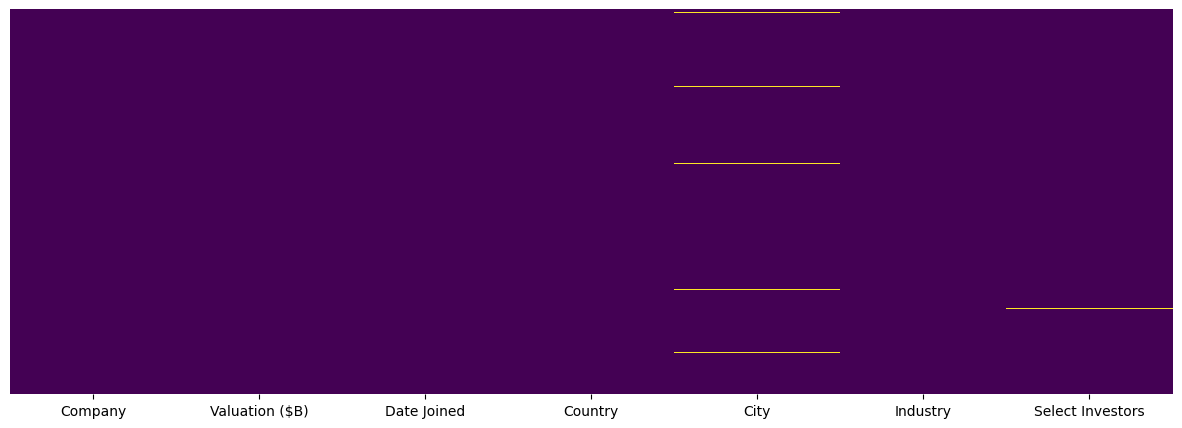

In [25]:
plt.figure(figsize=(15,5))
sns.heatmap(df_unicorn.isnull(), yticklabels=False, cbar=False, cmap='viridis')

- Plotting the missing values by percentage

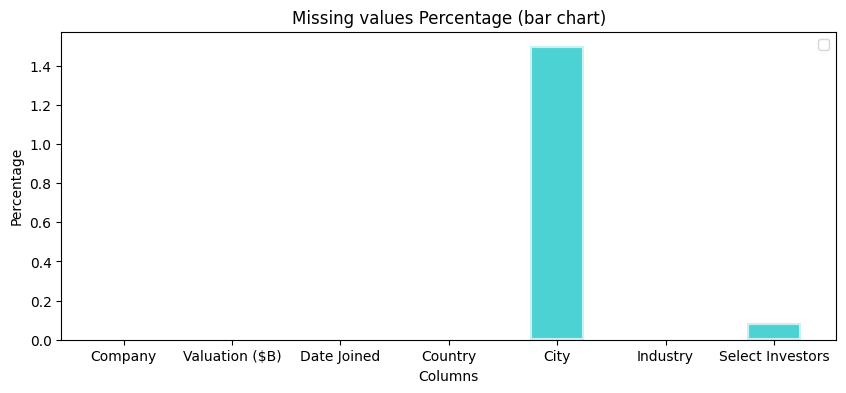

In [26]:
missing_percentage = df_unicorn.isnull().sum()/len(df_unicorn)*100
plt.figure(figsize=(10,4))
plt.bar(df_unicorn.columns, missing_percentage, width=0.5, color="c", edgecolor="w", linewidth=3, alpha=0.7)
plt.title("Missing values Percentage (bar chart)")
plt.xlabel("Columns")
plt.ylabel("Percentage")
plt.legend()
plt.show()

In [27]:
missing_percentage = df_unicorn.isnull().sum()/len(df_unicorn)*100
missing_percentage

Company             0.000000
Valuation ($B)      0.000000
Date Joined         0.000000
Country             0.000000
City                1.498751
Industry            0.000000
Select Investors    0.083264
dtype: float64

In [28]:
df_unicorn.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City',
       'Industry', 'Select Investors'],
      dtype='object')

## Observations:
---
- We have `18` missing values i.e `1.49%` in `City` column and `1` missing value i.e `0.08%` in `Select Investors` column
- As both columns are of categorical type so we will impute them through **mode imputation** technique
---

- Imputing missing values

In [29]:
city_mode = df_unicorn['City'].mode()[0]
investors_mode = df_unicorn['Select Investors'].mode()[0]

df_unicorn['City'].fillna(city_mode, inplace=True)
df_unicorn['Select Investors'].fillna(investors_mode, inplace=True)


- Verifying imputation of null values

In [30]:
df_unicorn.isnull().sum()

Company             0
Valuation ($B)      0
Date Joined         0
Country             0
City                0
Industry            0
Select Investors    0
dtype: int64

> **Note**: As you can see we have `0` missing values in our dataset. So our dataset is properly clean from missing values

## **2.3. Dealing with the Duplicates values**
- Removing duplicates is one of the most important part of the data wrangling process, we must remove the duplicates in order to get the correct insights from the data
- If you do not remove duplicates from a dataset, it can lead to incorrect insights and analysis
- Duplicates can skew statistical measures such as mean, median, and standard deviation, and can also lead to over-representation of certain data points
- It is important to remove duplicates to ensure the accuracy and reliability of your data analysis

- Checking duplicates in the dataset

In [31]:
df_unicorn.duplicated().sum()

0

- **Note:** No duplicate values are found, so we are good to go

## **3.0 Insights from Data**

In [32]:
df_unicorn.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City',
       'Industry', 'Select Investors'],
      dtype='object')

### **3.1 Identify the top `10` countries with highest number of unicorn companies?**


In [33]:
sorted_countries = df_unicorn['Country'].value_counts().sort_values(ascending=False)
top_ten_countries = sorted_countries[:10]

top_ten_countries_name = top_ten_countries.index
top_ten_countries_count = top_ten_countries.values

In [34]:
top_ten_countries

Country
United States     645
China             173
India              70
United Kingdom     48
Germany            29
Israel             23
France             23
Canada             20
Brazil             16
South Korea        16
Name: count, dtype: int64

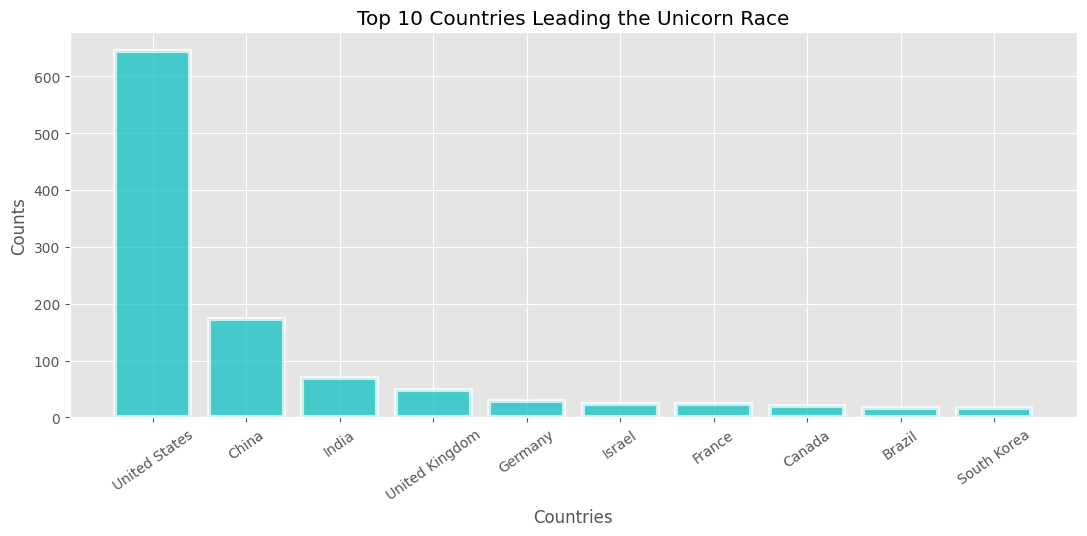

In [35]:
from matplotlib import style
style.use("ggplot")

plt.figure(figsize=(13,5))
plt.bar(top_ten_countries_name, top_ten_countries_count, width=0.8, color="c", \
        edgecolor="w", linewidth=3, alpha=0.7)
# plt.yscale('log')
plt.title("Top 10 Countries Leading the Unicorn Race")
plt.xlabel("Countries")
plt.ylabel("Counts")
plt.xticks(rotation=35)
plt.show()

### **3.2 Which are the top 10 most valued unicorn companies?**

In [36]:
df_unicorn[['Company', 'Valuation ($B)']].head(10)

,Company,Valuation ($B)
0,ByteDance,140.0
1,SpaceX,127.0
2,SHEIN,100.0
3,Stripe,95.0
4,Canva,40.0
5,Checkout.com,40.0
6,Instacart,39.0
7,Databricks,38.0
8,Revolut,33.0
9,Epic Games,31.5


In [37]:
top_ten_companies = df_unicorn['Company'].head(10)
top_ten_valuations = df_unicorn['Valuation ($B)'].head(10)

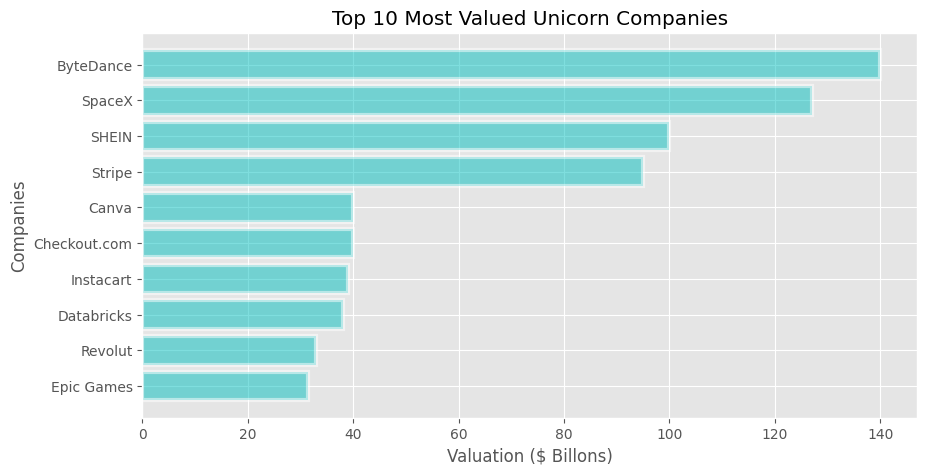

In [38]:
plt.figure(figsize=(10,5))
plt.barh(top_ten_companies[::-1], top_ten_valuations[::-1], color="c", \
        edgecolor="w", linewidth=3, alpha=0.5)
plt.title("Top 10 Most Valued Unicorn Companies")
plt.ylabel("Companies")
plt.xlabel("Valuation ($ Billons)")
plt.show()

In [39]:
df_unicorn.head(10)

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."
5,Checkout.com,40.0,2019-05-02,United Kingdom,London,Fintech,"Tiger Global Management, Insight Partners, DST..."
6,Instacart,39.0,2014-12-30,United States,San Francisco,"Supply chain, logistics, & delivery","Khosla Ventures, Kleiner Perkins Caufield & By..."
7,Databricks,38.0,2019-02-05,United States,San Francisco,Data management & analytics,"Andreessen Horowitz, New Enterprise Associates..."
8,Revolut,33.0,2018-04-26,United Kingdom,London,Fintech,"index Ventures, DST Global, Ribbit Capital"
9,Epic Games,31.5,2018-10-26,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures"


### **3.3 What is the distribution of unicorn company valuations (i.e. how many are valued between '(1-20)B','(20-40)B' and '(40-60)B' etc.)?**

In [40]:
ranges = [0, 20, 40, 60, 80, 100, 120, 140]
names = ['(1-20) $B', '(20-40) $B', '(40-60) $B', '(60-80) $B', '(80-100) $B', '(100-120) $B', '(120-140) $B']
companies_valuations = pd.cut(df_unicorn['Valuation ($B)'], bins=ranges, labels=names).value_counts()

companies_size = list(companies_valuations.index)
companies_count = list(companies_valuations.values)

In [41]:
companies_valuations

Valuation ($B)
(1-20) $B       1187
(20-40) $B        10
(80-100) $B        2
(120-140) $B       2
(40-60) $B         0
(60-80) $B         0
(100-120) $B       0
Name: count, dtype: int64

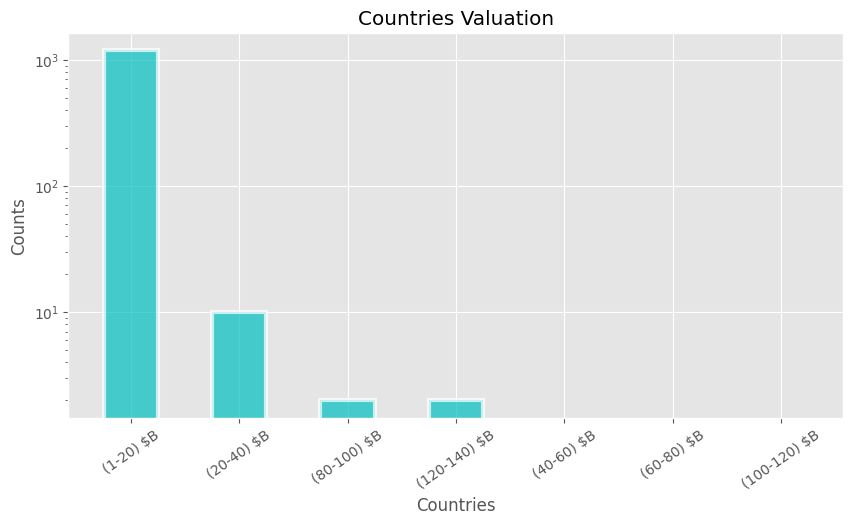

In [42]:
plt.figure(figsize=(10,5))
plt.bar(companies_size, companies_count, width=0.5, color="c", \
        edgecolor="w", linewidth=3, alpha=0.7)
plt.yscale('log')
plt.title("Countries Valuation")
plt.xlabel("Countries")
plt.ylabel("Counts")
plt.xticks(rotation=35)
plt.show()

### **3.4 Top 5 industries having the most unicorn companies?**

In [43]:
df_unicorn.groupby('Industry')['Company'].count()

Industry
Artificial Intelligence                 11
Artificial intelligence                 76
Auto & transportation                   38
Consumer & retail                       30
Cybersecurity                           58
Data management & analytics             45
E-commerce & direct-to-consumer        108
Edtech                                  32
Fintech                                252
Hardware                                39
Health                                  95
Internet software & services           231
Mobile & telecommunications             39
Other                                   65
Supply chain, logistics, & delivery     68
Travel                                  14
Name: Company, dtype: int64

> **Note:** In our `Industry` column `Artificial Intelligence` and `Artificial intelligence` both are showing as different values so we'll solve this problem first

- Capitalizing each value in the `Industry` column

In [44]:
df_unicorn['Industry'] = df_unicorn['Industry'].apply(lambda x: x.capitalize())

In [45]:
top_five_industries = df_unicorn.groupby('Industry')['Company'].count().sort_values(ascending=False)[:5]
top_five_industries

Industry
Fintech                            252
Internet software & services       231
E-commerce & direct-to-consumer    108
Health                              95
Artificial intelligence             87
Name: Company, dtype: int64

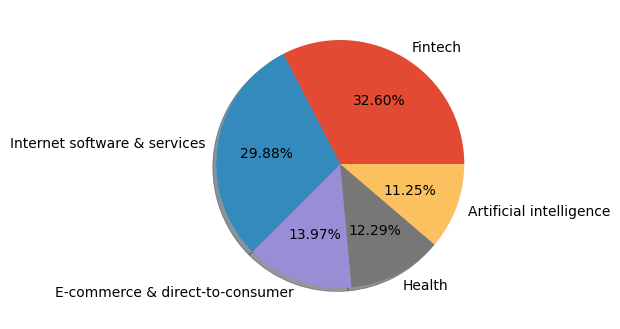

In [46]:
# fig, ax = plt.subplots(figsize=(8,6))
plt.figure(figsize=(4,5))
plt.pie(top_five_industries.values, labels=top_five_industries.index, 
       autopct='%1.2f%%', shadow=True)
plt.show()

### **3.5 How has the number of unicorn companies changed over time (by year)?**

In [47]:
# Creating new column to store only year e.g 2011 to groupby() with company column
unicorn_years = pd.Series(pd.to_datetime(df_unicorn['Date Joined'], format='%Y-%m-%d')).dt.year
df_unicorn['Date Joined (years)'] = unicorn_years

# company count w.r.t year
unicorn_comp_over_time = df_unicorn.groupby('Date Joined (years)')['Company'].count()
unicorn_comp_over_time

Date Joined (years)
2011      2
2012      4
2013      3
2014     12
2015     34
2016     21
2017     42
2018     97
2019    102
2020    106
2021    527
2022    251
Name: Company, dtype: int64

In [48]:
joined_years = list(unicorn_comp_over_time.index)
company_counts = list(unicorn_comp_over_time.values)

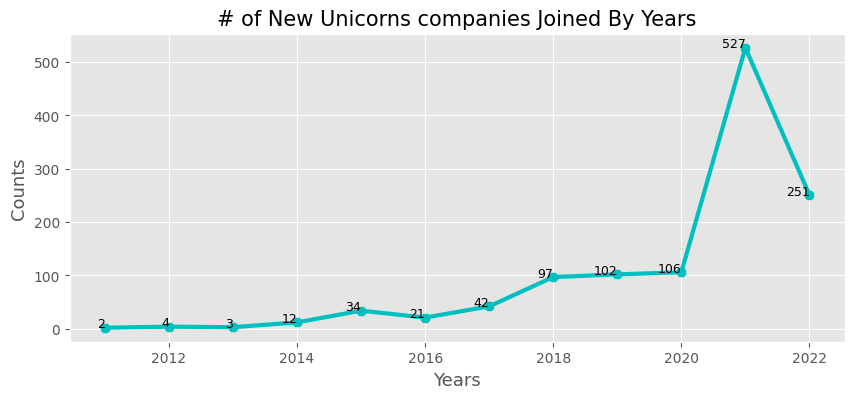

In [49]:
fig, ax = plt.subplots()

# use to create plot if you want data labels
ax.plot(joined_years, company_counts, "c8-", linewidth=3)
fig.set_size_inches(10, 4)

# Label data points
for i, (x, y) in enumerate(zip(joined_years, company_counts)):
    ax.text(x, y, str(y), ha='right', fontsize=9, color="black")

plt.title("# of New Unicorns companies Joined By Years", fontsize=15)
plt.xlabel("Years", fontsize=13)
plt.ylabel("Counts", fontsize=13)

plt.show()